# Credi Card Fraud Detection

### Source: Kaggle
          https://www.kaggle.com/mlg-ulb/creditcardfraud


### Contents
    1. Loading the data
    2. Understanding the data
    3. Data Preparation
       A] Data Imputation
       B] Feature Selection
    4. Balancing the Target
       A] Undersampling
    5. Model Selection
    6. Initial Model 
       A] Modeling
       B] Model Evaluation
    7. Hyperparameter Tuning
    8. Final Prediction

## Loading the data

In [1]:
import pandas as pd

cc = pd.read_csv("creditcard.csv")
cc.shape

(284807, 31)

In [2]:
cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [3]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Understanding the Data

C:\Users\Kanchan\AppData\Local\Temp/ipykernel_12400/2809006246.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  cc.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

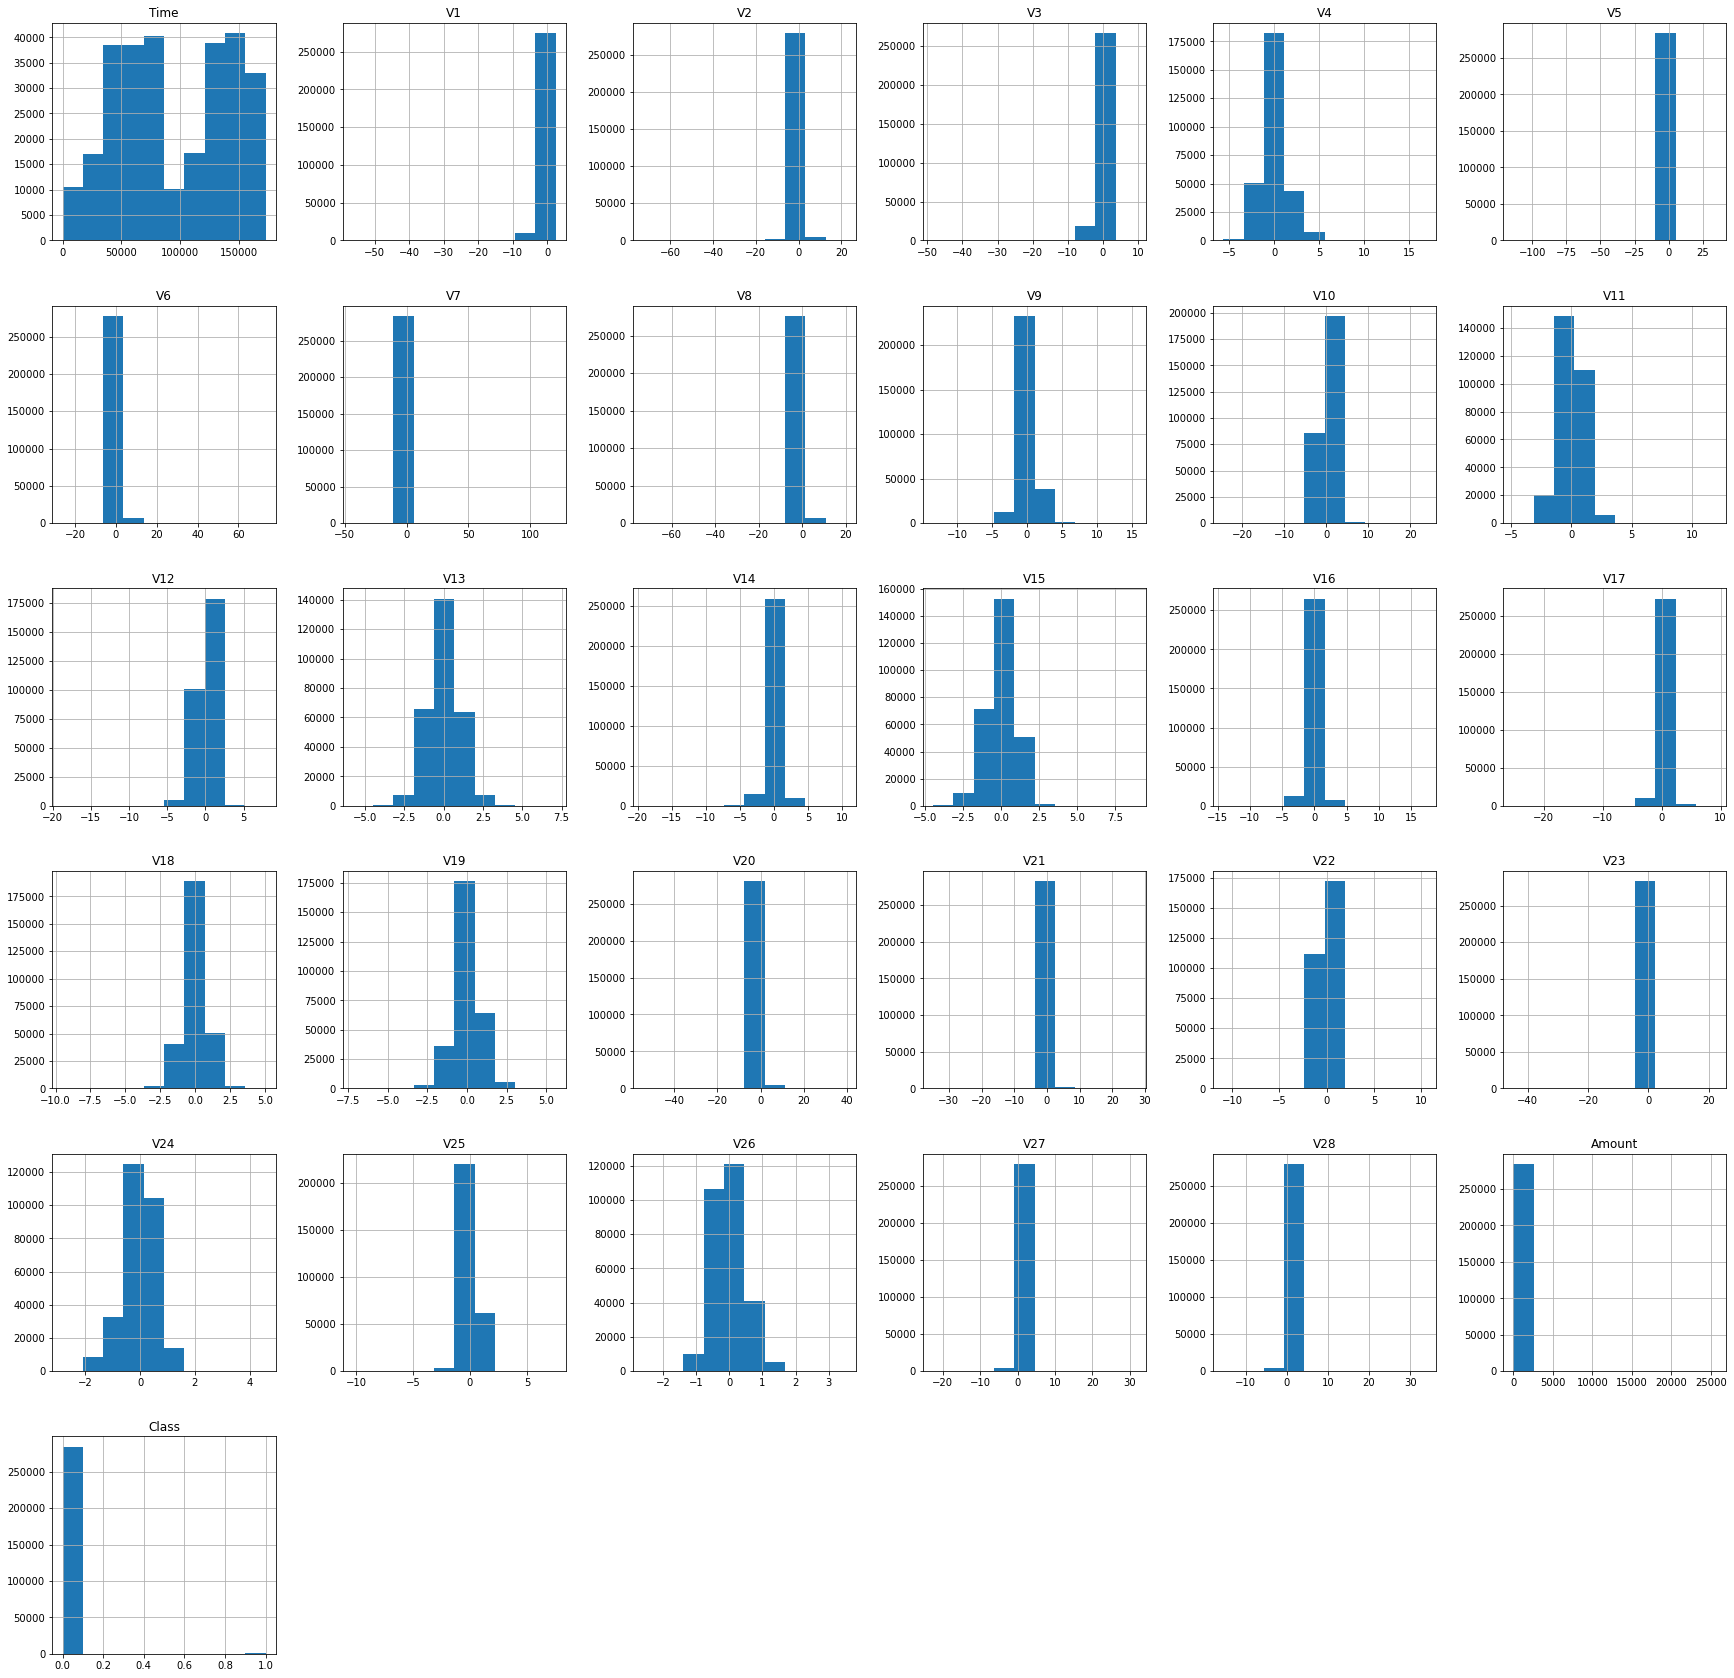

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,30))
cc.hist(ax = ax)

C:\Users\Kanchan\anaconda3\envs\cc_fraud\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

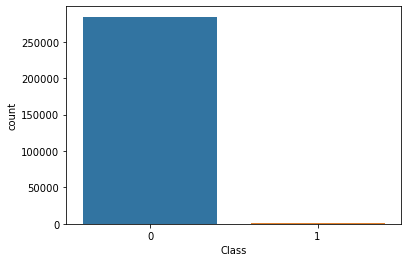

In [5]:
import seaborn as sns

sns.countplot(cc['Class'])

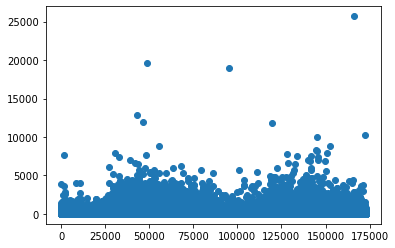

In [6]:
plt.scatter(cc['Time'], cc['Amount'])

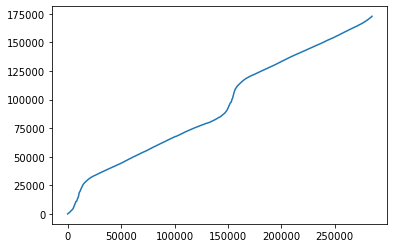

In [7]:
plt.plot(cc['Time'])

In [8]:
act_time = cc['Time'].diff()  #getting reverse cumulatives

In [9]:
pd.crosstab(act_time, cc['Class'])

Class,0,1
Time,,
0.0,159967,248
1.0,99916,143
2.0,15576,44
3.0,4141,15
4.0,1798,9
5.0,947,14
6.0,613,6
7.0,375,5
8.0,296,2


In [10]:
##Checking to see if Frauds have some pattern wrt Amount

import numpy as np
%matplotlib inline

#total unique values in Amount
print('Total unique value',len(cc['Amount'].unique()))
print('Maximum Value', cc['Amount'].max())
print('Minimum Value', cc['Amount'].min())

#Creating class intervals for Amount
bins = np.arange(0, 26000, 1000)
classint = pd.DataFrame(pd.cut(cc['Amount'], bins = bins))

#Adding the class in the orginial dataset
cc1 = cc.copy()
cc1['Classamt']=classint

#Analyzing the frauds wrt the amounts
pd.crosstab(cc1['Classamt'],cc1['Class'])

Total unique value 32767
Maximum Value 25691.16
Minimum Value 0.0


Class,0,1
Classamt,,
"(0.0, 1000.0]",279586,456
"(1000.0, 2000.0]",2256,8
"(2000.0, 3000.0]",391,1
"(3000.0, 4000.0]",164,0
"(4000.0, 5000.0]",65,0
"(5000.0, 6000.0]",23,0
"(6000.0, 7000.0]",11,0
"(7000.0, 8000.0]",9,0
"(8000.0, 9000.0]",4,0


## Data Preparation

### Data Cleaning

#### 1. Outliers

<AxesSubplot:>

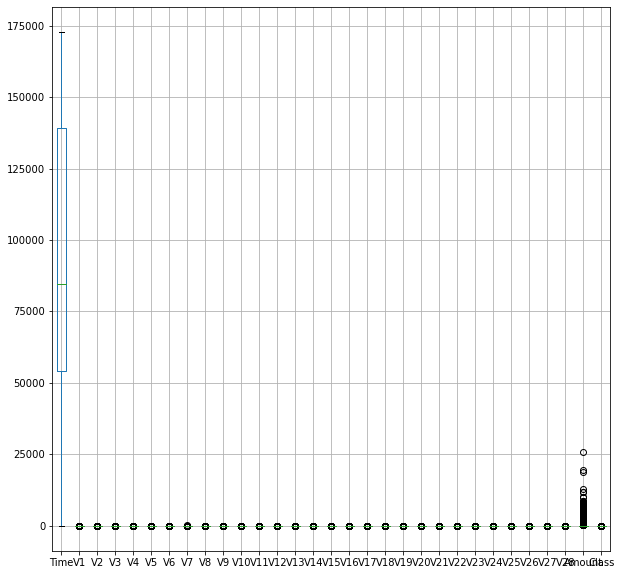

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
cc.boxplot(ax=ax)

In [12]:
len(cc.columns)

31

In [13]:
from sklearn.neighbors import LocalOutlierFactor

l = LocalOutlierFactor()
lfit = l.fit_predict(cc)
lfit  #-1 = Outlier

array([-1,  1, -1, ..., -1,  1, -1])

In [14]:
outliers = np.where(lfit == -1)  
outliers  #tuple of outliers indices

(array([     0,      2,      3, ..., 284802, 284804, 284806], dtype=int32),)

In [15]:
outliers = np.asarray(outliers)  #Tuple to 2d array

cc2 = cc.copy()
cc3 = cc2.drop(outliers.flatten(), axis=0)  #Flatten() to convert 2d to 1d array
cc3

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
10,10.0,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0


#### 2. Standardization
##### Amount

In [16]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
cc3['Amount'] = scale.fit_transform(cc3[['Amount']])

#### 3. Checking for duplicated records

In [17]:
dupindex = cc3[cc3.duplicated()]
dupindex.index

Int64Index([    33,     35,    113,    114,    115,    221,    223,   1178,
              1180,   1382,
            ...
            282210, 282211, 282212, 282213, 282985, 282987, 283483, 283485,
            284191, 284193],
           dtype='int64', length=1058)

In [18]:
#Dropping duplicated rows
cc4 = cc3.drop(dupindex.index)
cc4.shape

(279443, 31)

In [19]:
cc_cleaned = cc4.copy()
cc_cleaned.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.400776,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.395856,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.389230,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.395806,0
10,10.0,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,-0.375123,0


### Feature Selection

#### 1. Feature Importance

In [20]:
target = cc_cleaned['Class']
variables = cc_cleaned.drop('Class', axis = 1)

from sklearn.ensemble import ExtraTreesClassifier
e = ExtraTreesClassifier()
efit = e.fit(variables,target)
importance = efit.feature_importances_

<BarContainer object of 30 artists>

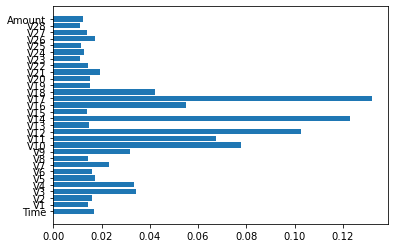

In [21]:
plt.barh(variables.columns, importance)

#### 2. Extracting relevant Features

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif
s = SelectKBest(score_func=f_classif, k=11)
feat_selected = s.fit(variables, target)
feat_selected.scores_

array([3.40496195e+01, 1.55516861e+03, 1.45987435e+03, 6.38787731e+03,
       3.19332812e+03, 1.44012319e+03, 4.15406630e+02, 5.69912286e+03,
       4.38661034e+02, 1.46029684e+03, 8.11175304e+03, 4.29292814e+03,
       1.27298266e+04, 7.59637762e+00, 1.87972141e+04, 2.35058578e+00,
       6.20850963e+03, 1.84870353e+04, 1.66845048e+03, 1.60822046e+02,
       1.08571290e+02, 2.63599179e+02, 1.24509178e+00, 2.18043413e+01,
       1.14948548e+01, 7.22595221e+00, 2.07828653e+00, 2.26933277e+02,
       3.79795613e+01, 2.42005460e+01])

In [23]:
impfeat = s.get_support()
cc_impfeat = variables[variables.columns[impfeat]]
cc_impfeat.head()

,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
1,1.191857,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
5,-0.425966,1.141109,-0.168252,0.476201,-0.371407,1.341262,0.359894,-0.137134,0.401726,-0.058133,0.068653
6,1.229658,0.045371,1.202613,-0.005159,-0.099254,-1.416907,-0.153826,0.167372,-0.443587,0.002821,-0.611987
9,-0.338262,1.044367,-0.222187,0.651583,-0.366846,1.017614,0.836390,-0.443523,0.739453,-0.540980,0.476677
10,1.449044,0.913860,-1.375667,-1.423236,1.626659,1.199644,-0.671440,-0.095045,0.031967,0.253415,0.854344


### Prepared Data

In [24]:
X = cc_impfeat.copy()
Y = target.copy()

## Balancing the Target 
### Undersampling

Input Shape: (768, 11) 
Target Shape: (768,)


C:\Users\Kanchan\anaconda3\envs\cc_fraud\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


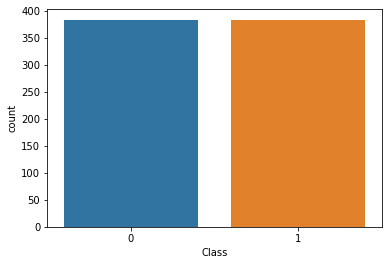

In [25]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
X_res, y_res = nm.fit_resample(X,Y)
sns.countplot(y_res)
print("Input Shape:",X_res.shape, "\nTarget Shape:", y_res.shape)

## Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=42, train_size=0.5)

## Model Selection

In [27]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

sv = SVC(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(random_state=42)
g = GaussianNB()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
model = [sv, knn, lr, g, dt, rf]


kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [28]:
scores = []
for i in model:
    s = cross_val_score(i, X_res, y_res, cv = kf, n_jobs=-1)
    m = s.mean()
    scores.append(m)
scores

[0.9271189336978811,
 0.9453520164046478,
 0.9283834586466166,
 0.9622693096377306,
 0.9322453861927548,
 0.9687628161312372]

<BarContainer object of 6 artists>

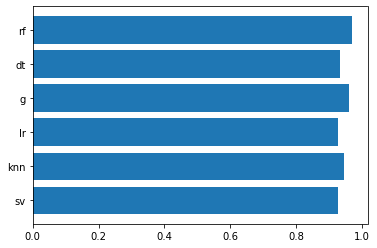

In [29]:
plt.barh(['sv', 'knn', 'lr', 'g', 'dt', 'rf'],scores)

#### 1. RandomForest

In [30]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
rffit = rf.fit(X_train,y_train)
rfpred = rf.predict(X_test)
print("F1 Score:",f1_score(y_test, rfpred), "\nPrecision:",precision_score(y_test, rfpred))

F1 Score: 0.9444444444444444 
Precision: 0.9497206703910615


#### 2. Gaussian

In [31]:
gfit = g.fit(X_train,y_train)
gpred = g.predict(X_test)
print("F1 Score:",f1_score(y_test, gpred), "\nPrecision:",precision_score(y_test, gpred))

F1 Score: 0.9545454545454546 
Precision: 0.9824561403508771


#### 3. Decision Tree

In [32]:
dtfit = dt.fit(X_train,y_train)
dtpred = dt.predict(X_test)
print("F1 Score:",f1_score(y_test, dtpred), "\nPrecision:",precision_score(y_test, dtpred))

F1 Score: 0.9080779944289694 
Precision: 0.9157303370786517


## Initial Model

### Modeling 

#__init()__ = g

#__fit___ = gfit

#__predicted__ = gpred

### Model Evaluation

In [33]:
#__init()__ = g
#__fit__ = gfit
#__predicted__ = gpred

print("Training Accuracy:",gfit.score(X_train,y_train),"\nTest Accuracy:",gfit.score(X_test,y_test))

Training Accuracy: 0.96875 
Test Accuracy: 0.9583333333333334


In [34]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test,gpred), columns=['Pred0','Pred1'])

,Pred0,Pred1
0,200,3
1,13,168


In [35]:
recall_score(y_test,gpred)

0.9281767955801105

## Hyper-param Tuning

In [47]:
#__init()__ = g
#__fit__ = gfit
#__predicted__ = gpred

grid_param = {'var_smoothing': np.logspace(0,-9,100)}
grid_model = GridSearchCV(estimator=g, param_grid=grid_param, scoring='recall', cv=10)
grid_fit = grid_model.fit(X_train,y_train)
best_model = grid_model.best_estimator_
print("Best Hyperparameter setting:",grid_model.best_params_)
print("Tuned Recall Score:", grid_model.best_score_)

Best Hyperparameter setting: {'var_smoothing': 0.0005336699231206307}
Tuned Recall Score: 0.9459523809523809


In [37]:
grid_pred = best_model.predict(X_test)
confusion_matrix(y_test,grid_pred)

array([[200,   3],
       [ 14, 167]], dtype=int64)

In [38]:
#Defining function to reduce prob threshold to 0.02
def thresh(d):
    vals = []
    for i in d:
        if i > 0.002:
            vals.append(1)
        else:
            vals.append(0)
    return vals

In [39]:
#Tuned Predicted values

grid_prob = best_model.predict_proba(X_test)
positive_prob = grid_prob[:,1]
y_pred = thresh(positive_prob)
    
confusion_matrix(y_test,y_pred)

array([[196,   7],
       [ 10, 171]], dtype=int64)

## Final Prediction

([<matplotlib.patches.Wedge at 0x2a022898>,
 [Text(-0.09885925800738044, 1.0955486511817858, 'Not Fraud'),
  Text(0.09885915543471273, -1.0955486604376528, 'Fraud')])

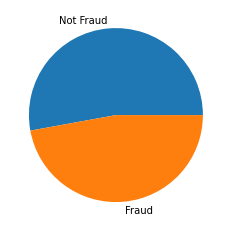

In [40]:
# Vizualizing Y_test
values = y_test.value_counts()
labels = ['Not Fraud','Fraud']
plt.pie(values,labels=labels)

([<matplotlib.patches.Wedge at 0x26fcccb8>,
 [Text(-0.12571559325378193, 1.0927925647682866, 'Not Fraud'),
  Text(0.12571549093915754, -1.092792576538625, 'Fraud')])

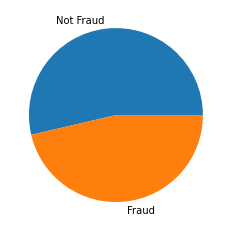

In [41]:
# Vizualizing Tuned Predicted Values
# y_pred

values1 = pd.DataFrame(y_pred).value_counts()
labels1 = ['Not Fraud','Fraud']
plt.pie(values1,labels=labels1)

In [45]:
#Model Metrics

print("Recall:",recall_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("F1:",f1_score(y_test,y_pred))
print("Train Score", best_model.fit(X_train,y_train).score(X_train,y_train))
print("Test Score/Accuracy", best_model.fit(X_train,y_train).score(X_test,y_test))

Recall: 0.9447513812154696
Precision: 0.9606741573033708
F1: 0.9526462395543176
Train Score 0.96875
Test Score/Accuracy 0.9557291666666666


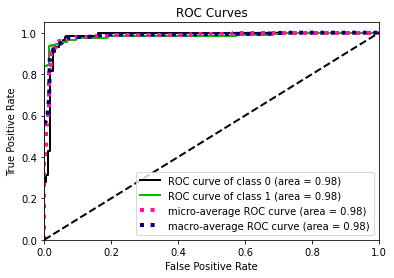

Area Under Curve: 0.9835070625697412


In [43]:
# ROC Curve and AUC

import scikitplot as skplt

skplt.metrics.plot_roc(y_test,best_model.predict_proba(X_test))
plt.show()
print("Area Under Curve:",roc_auc_score(y_test,positive_prob))